In [1]:
#importing necessary libraries
import pandas as pd
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = 'Case Study Data.csv'  
df = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataframe
df.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,"August 18, 2024, 9:32 PM",Category-106,Product-21f4,Business-de42,Location-1ba8,1,850
1,"August 18, 2024, 9:32 PM",Category-120,Product-4156,Business-de42,Location-1ba8,2,"1,910"
2,"August 18, 2024, 9:32 PM",Category-121,Product-49bd,Business-de42,Location-1ba8,1,"3,670"
3,"August 18, 2024, 9:32 PM",Category-76,Product-61dd,Business-de42,Location-1ba8,1,"2,605"
4,"August 18, 2024, 9:32 PM",Category-119,Product-66e0,Business-de42,Location-1ba8,5,"1,480"


In [4]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333405 entries, 0 to 333404
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DATE                 333405 non-null  object
 1   ANONYMIZED CATEGORY  333405 non-null  object
 2   ANONYMIZED PRODUCT   333405 non-null  object
 3   ANONYMIZED BUSINESS  333405 non-null  object
 4   ANONYMIZED LOCATION  333405 non-null  object
 5   QUANTITY             333405 non-null  int64 
 6   UNIT PRICE           333397 non-null  object
dtypes: int64(1), object(6)
memory usage: 17.8+ MB


In [5]:
#The Number of rows and columns of the dataset
df.shape
print("Number of rows",df.shape[0])
print("Number of columns",df.shape[1])

Number of rows 333405
Number of columns 7


In [6]:
# Display statistical summary of the dataset
df.describe()

,QUANTITY
count,333405.000000
mean,2.321186
std,3.790614
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,359.000000


# DATA CLEANING AND PREPARATION

In [10]:
#Checking Missing Values In the dataset
df.isnull().values.any()

True

In [16]:
# Check for missing values per column
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             8
dtype: int64


In [18]:
# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 3524


In [20]:
# Check data types of each column
print("Data types:")
print(df.dtypes)

Data types:
DATE                   object
ANONYMIZED CATEGORY    object
ANONYMIZED PRODUCT     object
ANONYMIZED BUSINESS    object
ANONYMIZED LOCATION    object
QUANTITY                int64
UNIT PRICE             object
dtype: object


In [22]:
# Drop rows with missing 'UNIT PRICE'
df_cleaned = df.dropna(subset=['UNIT PRICE'])

In [24]:
# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

In [26]:
# Inspect the first few rows of the cleaned dataset
print("Preview of the cleaned dataset:")
print(df_cleaned.head())

Preview of the cleaned dataset:
                       DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
0  August 18, 2024, 9:32 PM        Category-106       Product-21f4   
1  August 18, 2024, 9:32 PM        Category-120       Product-4156   
2  August 18, 2024, 9:32 PM        Category-121       Product-49bd   
3  August 18, 2024, 9:32 PM         Category-76       Product-61dd   
4  August 18, 2024, 9:32 PM        Category-119       Product-66e0   

  ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY UNIT PRICE  
0       Business-de42       Location-1ba8         1        850  
1       Business-de42       Location-1ba8         2      1,910  
2       Business-de42       Location-1ba8         1      3,670  
3       Business-de42       Location-1ba8         1      2,605  
4       Business-de42       Location-1ba8         5      1,480  


In [28]:
# Check for remaining missing values
print("\nMissing values per column after cleaning:")
print(df_cleaned.isnull().sum())


Missing values per column after cleaning:
DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             0
dtype: int64


In [30]:
# Verify that duplicates have been removed
print("\nNumber of duplicate rows after cleaning:")
print(df_cleaned.duplicated().sum())


Number of duplicate rows after cleaning:
0


In [32]:
# Check the number of unique values for key columns
print("\nNumber of unique values in key columns:")
key_columns = ['ANONYMIZED CATEGORY', 'ANONYMIZED BUSINESS', 'ANONYMIZED PRODUCT']
for column in key_columns:
    print(f"{column}: {df_cleaned[column].nunique()} unique values")


Number of unique values in key columns:
ANONYMIZED CATEGORY: 46 unique values
ANONYMIZED BUSINESS: 4800 unique values
ANONYMIZED PRODUCT: 817 unique values


In [34]:
# Display the original DATE column
print("Original DATE column sample:")
print(df_cleaned['DATE'].head())

# Step 1: Parse the DATE column with the specified format
try:
    df_cleaned['DATE'] = pd.to_datetime(df_cleaned['DATE'], format='%B %d, %Y, %I:%M %p', errors='coerce')
except Exception as e:
    print(f"Error parsing DATE column: {e}")

# Step 2: Identify and handle invalid dates
invalid_dates = df_cleaned[df_cleaned['DATE'].isna()]
if not invalid_dates.empty:
    print("\nInvalid Dates found (these rows will be dropped):")
    print(invalid_dates)

# Drop rows with invalid dates
df_cleaned = df_cleaned.dropna(subset=['DATE'])

# Step 3: Verify the cleaned DATE column
print("\nCleaned DATE column sample:")
print(df_cleaned['DATE'].head())

# Extract and validate the date range
print("\nDate Range in the dataset:")
print("Min Date:", df_cleaned['DATE'].min())
print("Max Date:", df_cleaned['DATE'].max())

Original DATE column sample:
0    August 18, 2024, 9:32 PM
1    August 18, 2024, 9:32 PM
2    August 18, 2024, 9:32 PM
3    August 18, 2024, 9:32 PM
4    August 18, 2024, 9:32 PM
Name: DATE, dtype: object

Cleaned DATE column sample:
0   2024-08-18 21:32:00
1   2024-08-18 21:32:00
2   2024-08-18 21:32:00
3   2024-08-18 21:32:00
4   2024-08-18 21:32:00
Name: DATE, dtype: datetime64[ns]

Date Range in the dataset:
Min Date: 2024-01-01 05:54:00
Max Date: 2024-12-31 18:24:00


In [35]:
# Create "Month-Year" column
df_cleaned['Month-Year'] = df_cleaned['DATE'].dt.to_period('M').astype(str)

# Verify the new column
print(df_cleaned[['DATE', 'Month-Year']].head())

                 DATE Month-Year
0 2024-08-18 21:32:00    2024-08
1 2024-08-18 21:32:00    2024-08
2 2024-08-18 21:32:00    2024-08
3 2024-08-18 21:32:00    2024-08
4 2024-08-18 21:32:00    2024-08


In [37]:
df_cleaned.columns

Index(['DATE', 'ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT',
       'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION', 'QUANTITY', 'UNIT PRICE',
       'Month-Year'],
      dtype='object')

In [40]:
print(df_cleaned['DATE'].dtypes)  # Verify the column's data type

datetime64[ns]


In [42]:
print(df_cleaned['Month-Year'].unique())  # Check unique month-year combinations

['2024-08' '2024-06' '2024-11' '2024-09' '2024-10' '2024-05' '2024-02'
 '2024-04' '2024-07' '2024-03' '2024-01' '2024-12']


In [44]:
df_cleaned['Month-Year'] = df_cleaned['DATE'].dt.to_period('M').astype(str)

# EXPLORATORY DATA ANALYSIS


In [47]:
# Convert numerical columns to float
df_cleaned['QUANTITY'] = pd.to_numeric(df_cleaned['QUANTITY'], errors='coerce')
df_cleaned['UNIT PRICE'] = pd.to_numeric(df_cleaned['UNIT PRICE'], errors='coerce')

In [48]:
# Drop rows with invalid data (e.g., NaNs after conversion)
df_cleaned = df_cleaned.dropna()

In [51]:
#create new column for analysis
df_cleaned['TOTAL VALUE'] = df_cleaned['QUANTITY'] * df_cleaned['UNIT PRICE']
print(df_cleaned.head())

                  DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
0  2024-08-18 21:32:00        Category-106       Product-21f4   
8  2024-08-18 21:32:00         Category-96       Product-87b2   
14 2024-11-25 16:42:00         Category-82       Product-91f3   
16 2024-11-25 16:42:00         Category-78       Product-b409   
24 2024-05-23 20:22:00         Category-91       Product-32b3   

   ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY  UNIT PRICE Month-Year  \
0        Business-de42       Location-1ba8         1       850.0    2024-08   
8        Business-de42       Location-1ba8         1       805.0    2024-08   
14       Business-aab8       Location-128a         1       815.0    2024-11   
16       Business-aab8       Location-128a         1       750.0    2024-11   
24       Business-22a2       Location-c2f2         3       640.0    2024-05   

    TOTAL VALUE  
0         850.0  
8         805.0  
14        815.0  
16        750.0  
24       1920.0  


In [53]:
# Aggregate data by category
category_summary = df_cleaned.groupby('ANONYMIZED CATEGORY').agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Value=('TOTAL VALUE', 'sum')
).reset_index()

# Check the aggregated data
print(category_summary.head())

  ANONYMIZED CATEGORY  Total_Quantity  Total_Value
0        Category-100             970     817221.0
1        Category-101             200     181975.0
2        Category-102            1786     464463.0
3        Category-105             410     177509.0
4        Category-106            4130    2812169.0


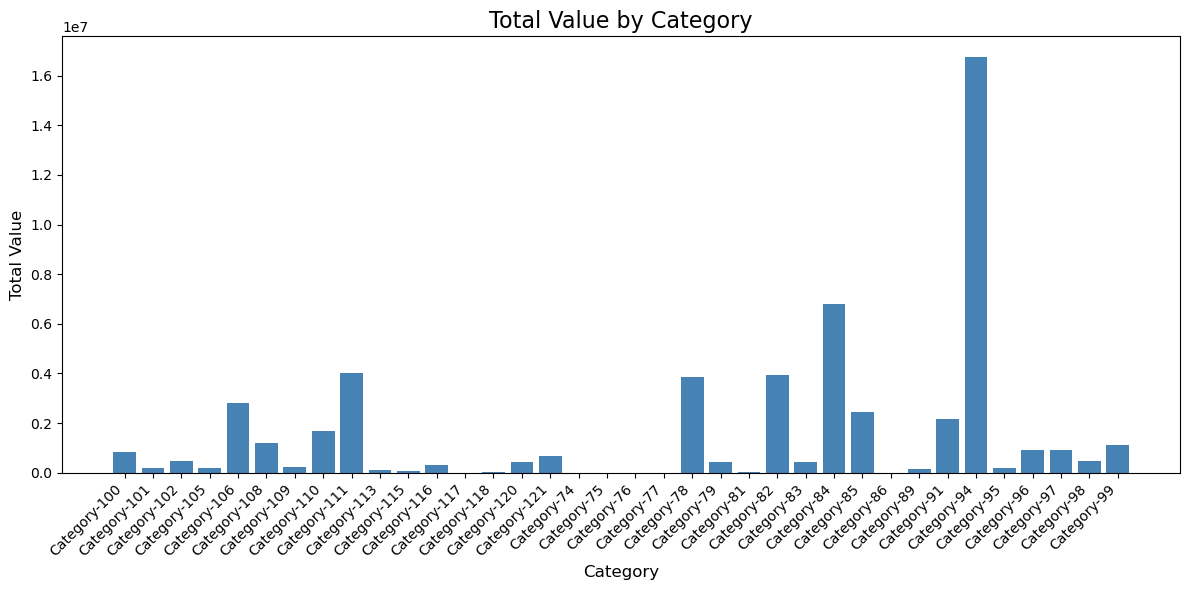

In [55]:
# Visualize Total Value by Category
plt.figure(figsize=(12, 6))
plt.bar(category_summary['ANONYMIZED CATEGORY'], category_summary['Total_Value'], color='steelblue')
plt.title("Total Value by Category", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Total Value", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [56]:
# Group by Anonymized Business
business_summary = df_cleaned.groupby('ANONYMIZED BUSINESS').agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Value=('TOTAL VALUE', 'sum')
).reset_index()

# Display summary table
print("Business Summary:")
print(business_summary)

Business Summary:
     ANONYMIZED BUSINESS  Total_Quantity  Total_Value
0          Business-0000               2        365.0
1          Business-003d              42      11390.0
2          Business-0072              37      15773.0
3          Business-0078              43      23420.0
4          Business-0086               2       1500.0
...                  ...             ...          ...
2960       Business-ffa9               1        820.0
2961       Business-ffae               2       1280.0
2962       Business-ffb1             142      73284.0
2963       Business-ffd2              13       6483.0
2964       Business-ffff              72      36475.0

[2965 rows x 3 columns]


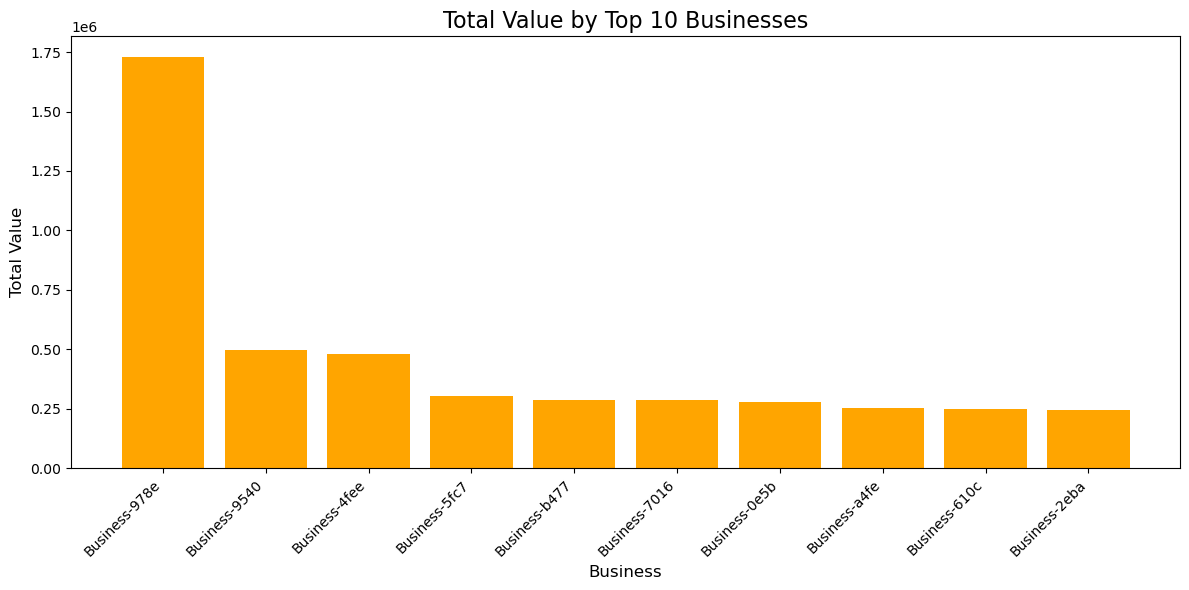

In [57]:
# Get the top 10 businesses by Total Value
top_businesses = business_summary.sort_values(by='Total_Value', ascending=False).head(10)

# Visualize Total Value by Top 10 Businesses
plt.figure(figsize=(12, 6))
plt.bar(top_businesses['ANONYMIZED BUSINESS'], top_businesses['Total_Value'], color='orange')
plt.title("Total Value by Top 10 Businesses", fontsize=16)
plt.xlabel("Business", fontsize=12)
plt.ylabel("Total Value", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [60]:
print(df_cleaned['DATE'].head())  # Check the first few entries of the DATE column
print(df_cleaned['DATE'].dtypes)  # Verify the column's data type

0    2024-08-18 21:32:00
8    2024-08-18 21:32:00
14   2024-11-25 16:42:00
16   2024-11-25 16:42:00
24   2024-05-23 20:22:00
Name: DATE, dtype: datetime64[ns]
datetime64[ns]


In [63]:
monthly_trends = df_cleaned.groupby('Month-Year').agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Value=('TOTAL VALUE', 'sum')
).reset_index()
print(monthly_trends.head())

  Month-Year  Total_Quantity  Total_Value
0    2024-01            5881    3630510.0
1    2024-02            4277    2587664.0
2    2024-03            3877    2356885.0
3    2024-04            4491    2514394.0
4    2024-05            6462    3886747.0


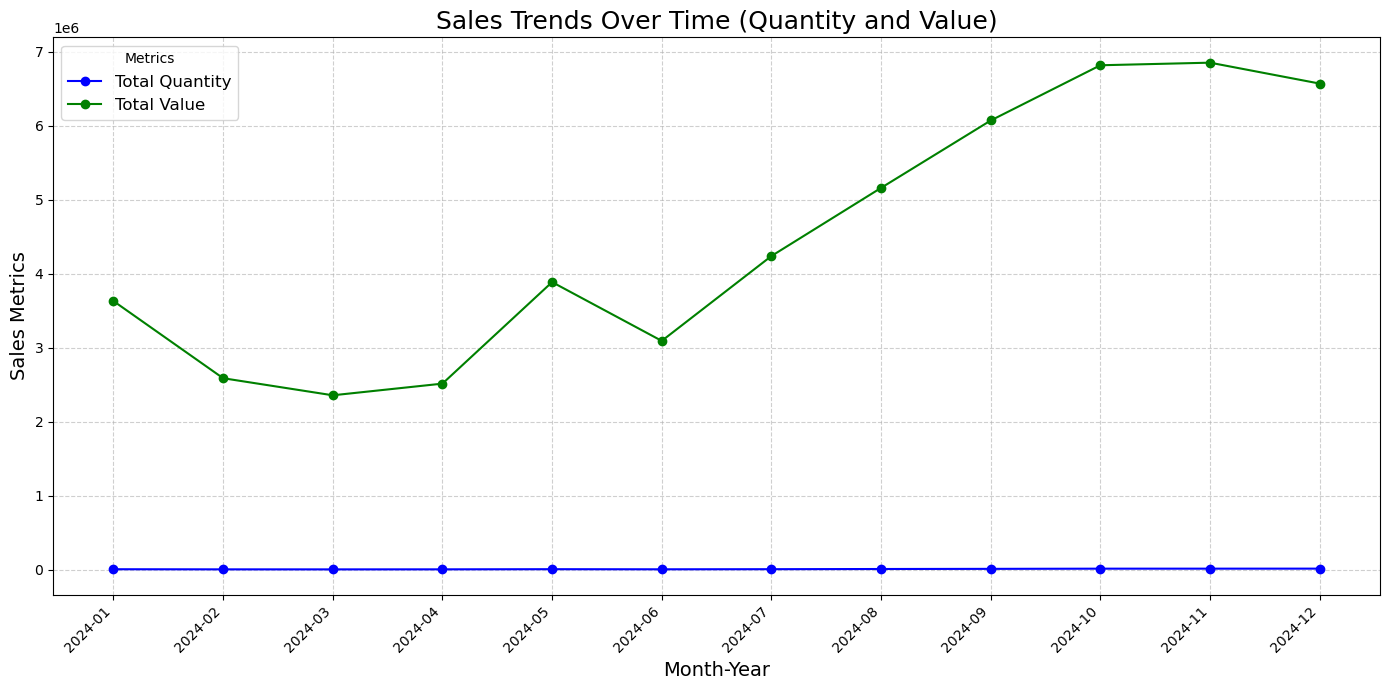

In [65]:
# Ensure the Month-Year column is in chronological order for plotting
monthly_trends = monthly_trends.sort_values(by='Month-Year')

plt.figure(figsize=(14, 7))
plt.plot(
    monthly_trends['Month-Year'], 
    monthly_trends['Total_Quantity'], 
    label='Total Quantity', 
    marker='o', 
    linestyle='-', 
    color='blue'
)
plt.plot(
    monthly_trends['Month-Year'], 
    monthly_trends['Total_Value'], 
    label='Total Value', 
    marker='o', 
    linestyle='-', 
    color='green'
)
plt.title("Sales Trends Over Time (Quantity and Value)", fontsize=18)
plt.xlabel("Month-Year", fontsize=14)
plt.ylabel("Sales Metrics", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title="Metrics", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [66]:
# Top 5 Most Frequently Purchased Products
top_quantity_products = df_cleaned.groupby('ANONYMIZED PRODUCT').agg(
    Total_Quantity=('QUANTITY', 'sum')
).reset_index().sort_values(by='Total_Quantity', ascending=False).head(5)

# Display table
print("Top 5 Most Frequently Purchased Products:")
print(top_quantity_products)

Top 5 Most Frequently Purchased Products:
    ANONYMIZED PRODUCT  Total_Quantity
291       Product-ee77            8350
79        Product-3d7f            6644
145       Product-703d            4997
200       Product-9c81            4930
190       Product-91f3            4723


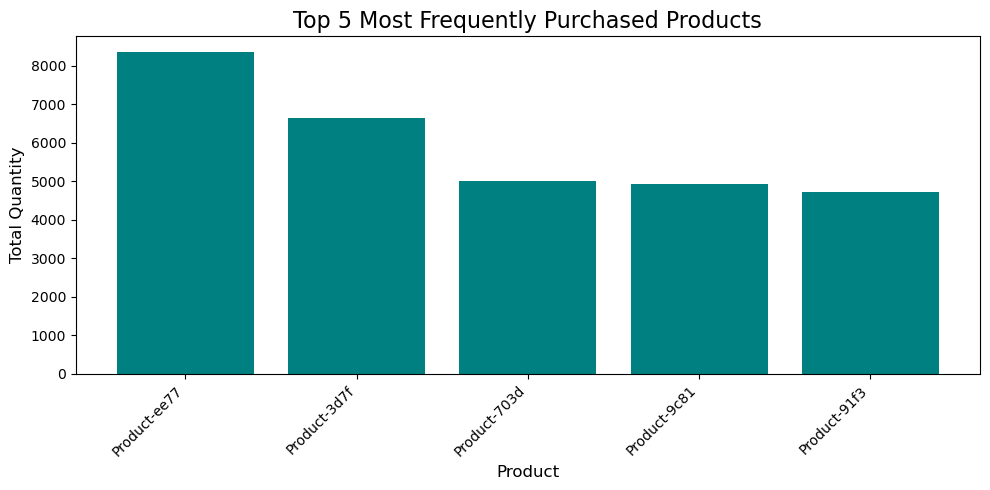

In [69]:
# Visualize
plt.figure(figsize=(10, 5))
plt.bar(top_quantity_products['ANONYMIZED PRODUCT'], top_quantity_products['Total_Quantity'], color='teal')
plt.title("Top 5 Most Frequently Purchased Products", fontsize=16)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Total Quantity", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [71]:
df_cleaned['UNIT PRICE'] = df_cleaned['UNIT PRICE'].replace(',', '', regex=True).astype(float)
df_cleaned['TOTAL VALUE'] = df_cleaned['QUANTITY'] * df_cleaned['UNIT PRICE']


In [73]:
# Ensure 'UNIT PRICE' column is clean
df_cleaned['UNIT PRICE'] = pd.to_numeric(df_cleaned['UNIT PRICE'].astype(str).str.replace(',', ''), errors='coerce')

# Handle missing or invalid values
df_cleaned['UNIT PRICE'] = df_cleaned['UNIT PRICE'].fillna(0)  # Replace NaNs with 0 (optional)

# Recalculate TOTAL VALUE
df_cleaned['TOTAL VALUE'] = df_cleaned['QUANTITY'] * df_cleaned['UNIT PRICE']

# Verify calculations
print(df_cleaned[['UNIT PRICE', 'TOTAL VALUE']].head())

# Group and get the top 5 most valuable products
top_value_products = df_cleaned.groupby('ANONYMIZED PRODUCT').agg(
    Total_Value=('TOTAL VALUE', 'sum')
).reset_index().sort_values(by='Total_Value', ascending=False).head(5)

# Display results
print("Top 5 Most Valuable Products:")
print(top_value_products)

    UNIT PRICE  TOTAL VALUE
0        850.0        850.0
8        805.0        805.0
14       815.0        815.0
16       750.0        750.0
24       640.0       1920.0
Top 5 Most Valuable Products:
    ANONYMIZED PRODUCT  Total_Value
79        Product-3d7f    5744170.0
145       Product-703d    4598970.0
190       Product-91f3    3912806.0
218       Product-b409    3422340.0
200       Product-9c81    2363320.0


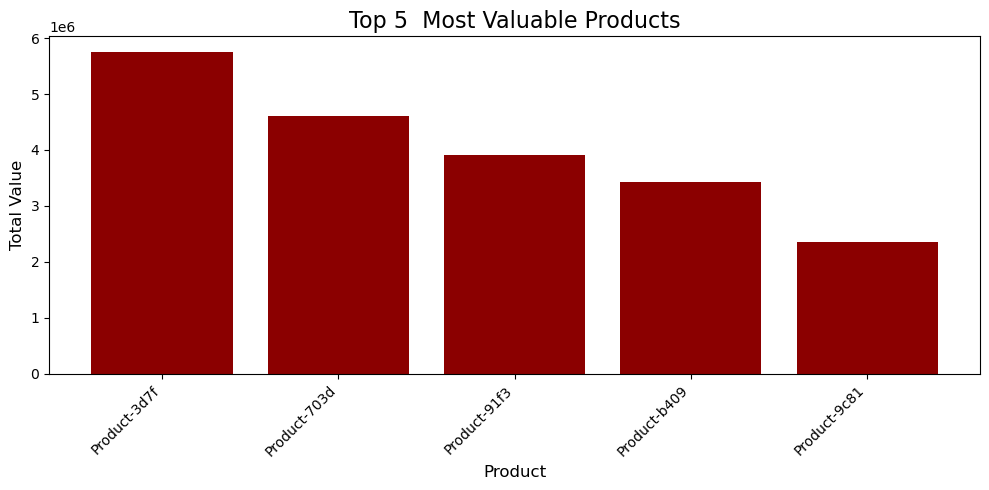

In [75]:
# Visualize
plt.figure(figsize=(10, 5))
plt.bar(top_value_products['ANONYMIZED PRODUCT'], top_value_products['Total_Value'], color='darkred')
plt.title("Top 5  Most Valuable Products", fontsize=16)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Total Value", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ADVANCED ANALYSIS

In [78]:
# Top Performing Businesses
top_businesses = df_cleaned.groupby('ANONYMIZED BUSINESS').agg(
    Total_Value=('TOTAL VALUE', 'sum')
).reset_index().sort_values(by='Total_Value', ascending=False).head(10)

# Display table
print("Top 10 Performing Businesses by Total Value:")
print(top_businesses)

Top 10 Performing Businesses by Total Value:
     ANONYMIZED BUSINESS  Total_Value
1789       Business-978e    1729770.0
1767       Business-9540     495931.0
946        Business-4fee     478338.0
1139       Business-5fc7     304996.0
2106       Business-b477     288638.0
1339       Business-7016     287366.0
160        Business-0e5b     278879.0
1920       Business-a4fe     251896.0
1161       Business-610c     249551.0
567        Business-2eba     246815.0


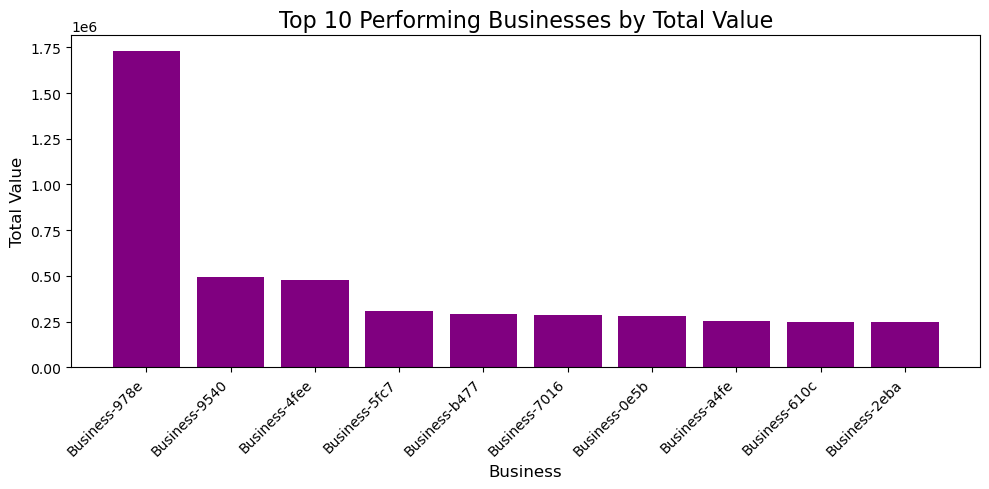

In [80]:
# Visualization
plt.figure(figsize=(10, 5))
plt.bar(top_businesses['ANONYMIZED BUSINESS'], top_businesses['Total_Value'], color='purple')
plt.title("Top 10 Performing Businesses by Total Value", fontsize=16)
plt.xlabel("Business", fontsize=12)
plt.ylabel("Total Value", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [82]:
# Sales Performance by Location
location_performance = df_cleaned.groupby('ANONYMIZED LOCATION').agg(
    Total_Value=('TOTAL VALUE', 'sum')
).reset_index().sort_values(by='Total_Value', ascending=False).head(10)

# Display table
print("Top 10 Locations by Sales Performance:")
print(location_performance)

Top 10 Locations by Sales Performance:
   ANONYMIZED LOCATION  Total_Value
20       Location-689f    6280897.0
13       Location-3e32    4540041.0
40       Location-e2f8    3557518.0
14       Location-3fc0    3555466.0
6        Location-1979    3520121.0
15       Location-47dc    3344243.0
46       Location-f37d    3238161.0
32       Location-b27b    3207504.0
17       Location-4ea1    2890781.0
8        Location-1ba8    2206512.0


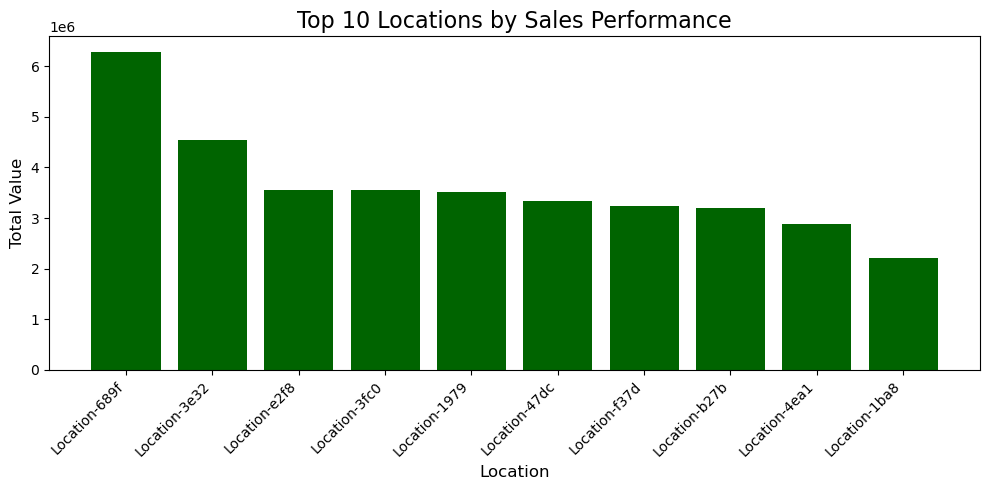

In [84]:
# Visualization
plt.figure(figsize=(10, 5))
plt.bar(location_performance['ANONYMIZED LOCATION'], location_performance['Total_Value'], color='darkgreen')
plt.title("Top 10 Locations by Sales Performance", fontsize=16)
plt.xlabel("Location", fontsize=12)
plt.ylabel("Total Value", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [86]:
# Top Categories by Total Value
category_performance = df_cleaned.groupby('ANONYMIZED CATEGORY').agg(
    Total_Value=('TOTAL VALUE', 'sum')
).reset_index().sort_values(by='Total_Value', ascending=False).head(10)

# Display table
print("Top 10 Categories by Total Value:")
print(category_performance)

Top 10 Categories by Total Value:
   ANONYMIZED CATEGORY  Total_Value
30         Category-94   16749695.0
25         Category-84    6798158.0
8         Category-111    4034218.0
23         Category-82    3930818.0
20         Category-78    3867714.0
4         Category-106    2812169.0
26         Category-85    2460159.0
29         Category-91    2168019.0
7         Category-110    1662766.0
5         Category-108    1188685.0


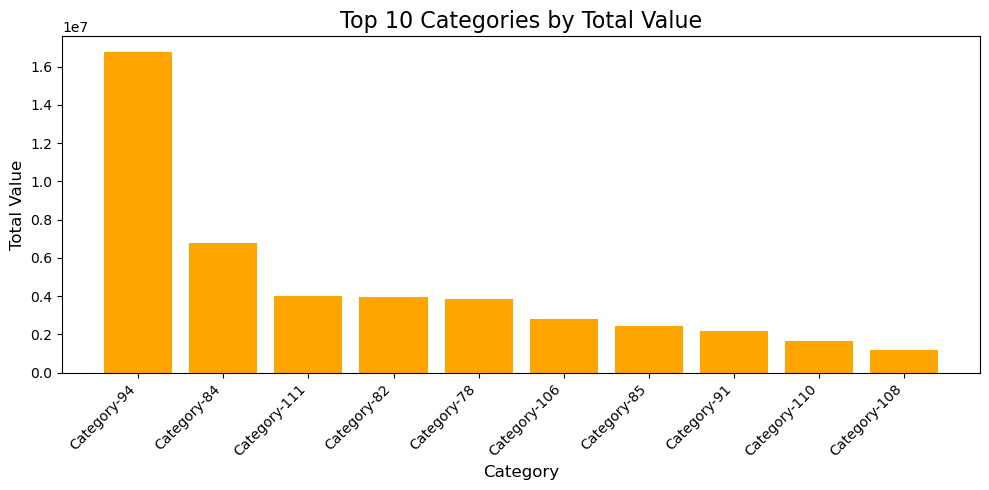

In [88]:
# Visualization
plt.figure(figsize=(10, 5))
plt.bar(category_performance['ANONYMIZED CATEGORY'], category_performance['Total_Value'], color='orange')
plt.title("Top 10 Categories by Total Value", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Total Value", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [90]:
# Top Frequent Purchasers
top_customers = df_cleaned.groupby('ANONYMIZED LOCATION').agg(
    Total_Purchases=('QUANTITY', 'sum')
).reset_index().sort_values(by='Total_Purchases', ascending=False).head(10)

# Display table
print("Top 10 Most Frequent Purchasers:")
print(top_customers)

Top 10 Most Frequent Purchasers:
   ANONYMIZED LOCATION  Total_Purchases
20       Location-689f            11243
13       Location-3e32             8674
40       Location-e2f8             6759
14       Location-3fc0             6737
6        Location-1979             6667
46       Location-f37d             6640
32       Location-b27b             5727
15       Location-47dc             5677
17       Location-4ea1             5339
8        Location-1ba8             3764


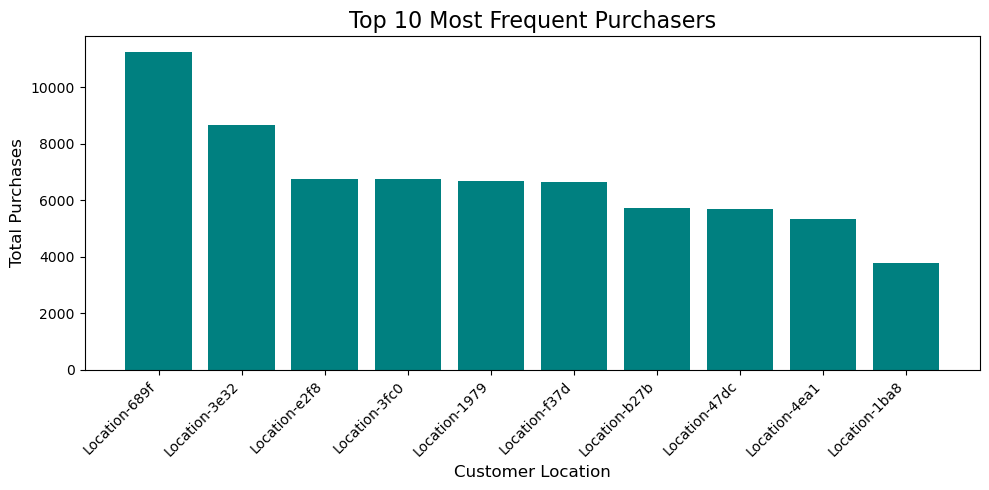

In [92]:
# Visualization
plt.figure(figsize=(10, 5))
plt.bar(top_customers['ANONYMIZED LOCATION'], top_customers['Total_Purchases'], color='teal')
plt.title("Top 10 Most Frequent Purchasers", fontsize=16)
plt.xlabel("Customer Location", fontsize=12)
plt.ylabel("Total Purchases", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [94]:
# Top Customers by Purchase Value
top_value_customers = df_cleaned.groupby('ANONYMIZED LOCATION').agg(
    Total_Value=('TOTAL VALUE', 'sum')
).reset_index().sort_values(by='Total_Value', ascending=False).head(10)

# Display table
print("Top 10 Customers by Total Value:")
print(top_value_customers)

Top 10 Customers by Total Value:
   ANONYMIZED LOCATION  Total_Value
20       Location-689f    6280897.0
13       Location-3e32    4540041.0
40       Location-e2f8    3557518.0
14       Location-3fc0    3555466.0
6        Location-1979    3520121.0
15       Location-47dc    3344243.0
46       Location-f37d    3238161.0
32       Location-b27b    3207504.0
17       Location-4ea1    2890781.0
8        Location-1ba8    2206512.0


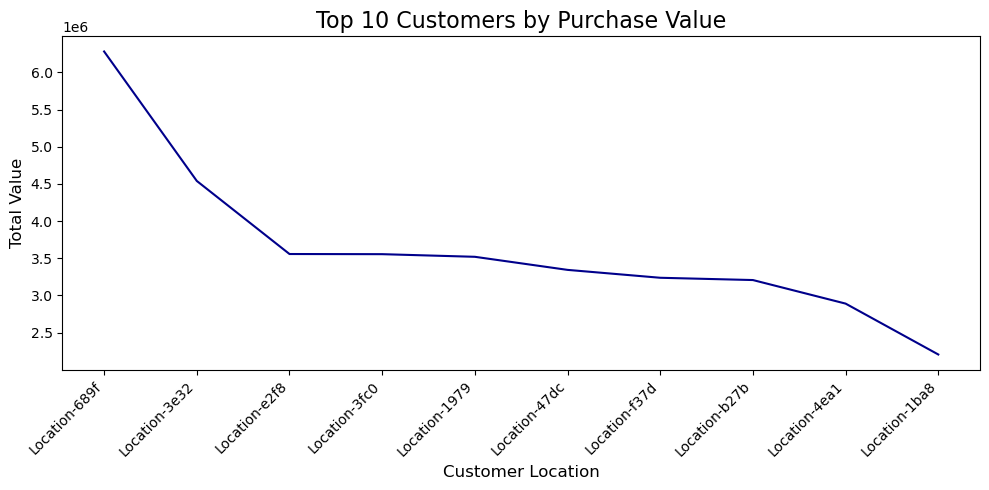

In [96]:
# Visualization
plt.figure(figsize=(10, 5))
plt.plot(top_value_customers['ANONYMIZED LOCATION'], top_value_customers['Total_Value'], color='darkblue')
plt.title("Top 10 Customers by Purchase Value", fontsize=16)
plt.xlabel("Customer Location", fontsize=12)
plt.ylabel("Total Value", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

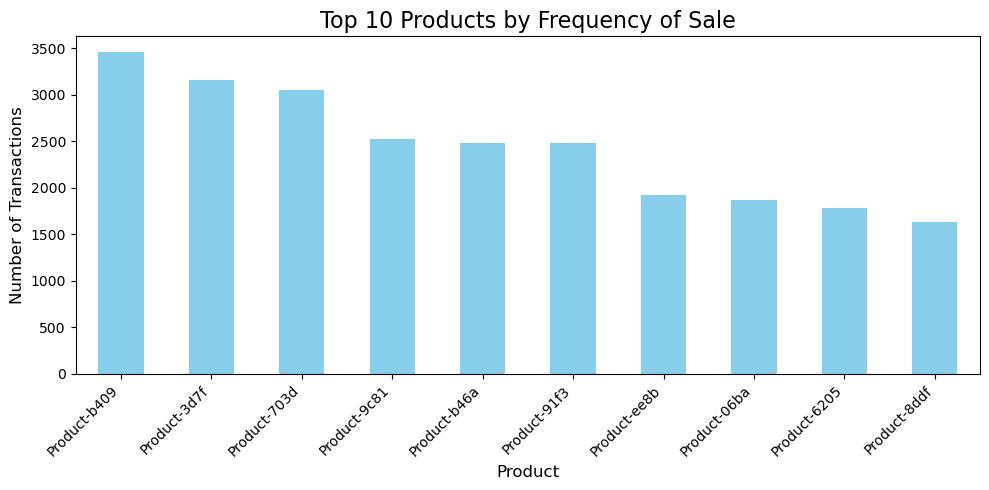

In [98]:
# Product Variety Analysis
product_distribution = df_cleaned['ANONYMIZED PRODUCT'].value_counts().head(10)

# Visualization
plt.figure(figsize=(10, 5))
product_distribution.plot(kind='bar', color='skyblue')
plt.title("Top 10 Products by Frequency of Sale", fontsize=16)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

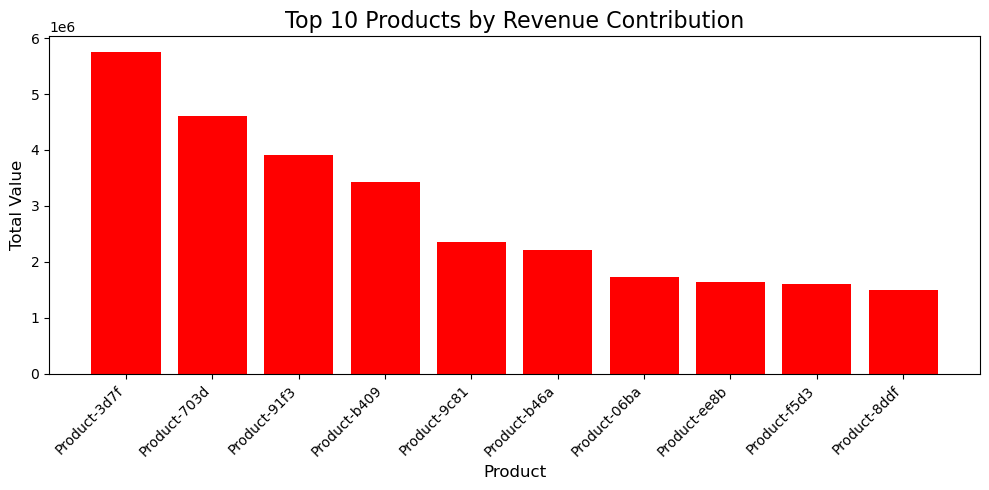

In [100]:
# Top 10 Products by Revenue
product_revenue = df_cleaned.groupby('ANONYMIZED PRODUCT').agg(
    Total_Value=('TOTAL VALUE', 'sum')
).reset_index().sort_values(by='Total_Value', ascending=False).head(10)

# Visualization
plt.figure(figsize=(10, 5))
plt.bar(product_revenue['ANONYMIZED PRODUCT'], product_revenue['Total_Value'], color='red')
plt.title("Top 10 Products by Revenue Contribution", fontsize=16)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Total Value", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [102]:

# Group by business and calculate total value
business_summary = df_cleaned.groupby('ANONYMIZED BUSINESS').agg(
    Total_Value=('TOTAL VALUE', 'sum')
).reset_index()

# Define thresholds or use quantiles to classify businesses
business_summary['Category'] = pd.qcut(
    business_summary['Total_Value'], 
    q=3, 
    labels=['Low Value', 'Medium Value', 'High Value']
)

# Verify classification
print("Business Classification:")
print(business_summary.head())


Business Classification:
  ANONYMIZED BUSINESS  Total_Value      Category
0       Business-0000        365.0     Low Value
1       Business-003d      11390.0  Medium Value
2       Business-0072      15773.0    High Value
3       Business-0078      23420.0    High Value
4       Business-0086       1500.0     Low Value


In [104]:
# Recommendations based on business category
recommendations = {
    'High Value': "Prioritize these businesses with personalized offers, loyalty programs, and premium support.",
    'Medium Value': "Focus on growing relationships through regular engagement, discounts, and value-added services.",
    'Low Value': "Use cost-effective communication channels to maintain engagement and identify growth opportunities."
}

# Map recommendations to each business
business_summary['Recommendations'] = business_summary['Category'].map(recommendations)

# Display classified businesses with recommendations
print("Businesses with Recommendations:")
print(business_summary.head())


Businesses with Recommendations:
  ANONYMIZED BUSINESS  Total_Value      Category  \
0       Business-0000        365.0     Low Value   
1       Business-003d      11390.0  Medium Value   
2       Business-0072      15773.0    High Value   
3       Business-0078      23420.0    High Value   
4       Business-0086       1500.0     Low Value   

                                     Recommendations  
0  Use cost-effective communication channels to m...  
1  Focus on growing relationships through regular...  
2  Prioritize these businesses with personalized ...  
3  Prioritize these businesses with personalized ...  
4  Use cost-effective communication channels to m...  


In [106]:
# Classify businesses into categories based on their Total_Value
thresholds = [0, 10000, 50000, df_cleaned['TOTAL VALUE'].max()]  # Adjust thresholds as needed
labels = ['Low Value', 'Medium Value', 'High Value']

# Add a Category column to classify businesses
business_summary['Category'] = pd.cut(
    business_summary['Total_Value'], 
    bins=thresholds, 
    labels=labels, 
    include_lowest=True
)

# Count the number of businesses in each category
category_counts = business_summary['Category'].value_counts()

# Print the counts for each category
print("Number of businesses by category:")
print(category_counts)


Number of businesses by category:
Category
Low Value       1864
Medium Value     821
High Value         4
Name: count, dtype: int64


# FORECASTING

In [109]:

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Aggregate monthly sales data
monthly_sales = df_cleaned.groupby('Month-Year').agg({'TOTAL VALUE': 'sum'}).reset_index()

# Convert Month-Year to datetime
monthly_sales['Month-Year'] = pd.to_datetime(monthly_sales['Month-Year'], format='%Y-%m')

# Set Month-Year as the index and ensure it's sorted
monthly_sales = monthly_sales.set_index('Month-Year').sort_index()

# Explicitly set the frequency to 'MS' (Month Start)
monthly_sales = monthly_sales.asfreq('MS')

# Verify the prepared data
print("\nPrepared Monthly Sales Data:")
print(monthly_sales.head())



Prepared Monthly Sales Data:
            TOTAL VALUE
Month-Year             
2024-01-01    3630510.0
2024-02-01    2587664.0
2024-03-01    2356885.0
2024-04-01    2514394.0
2024-05-01    3886747.0


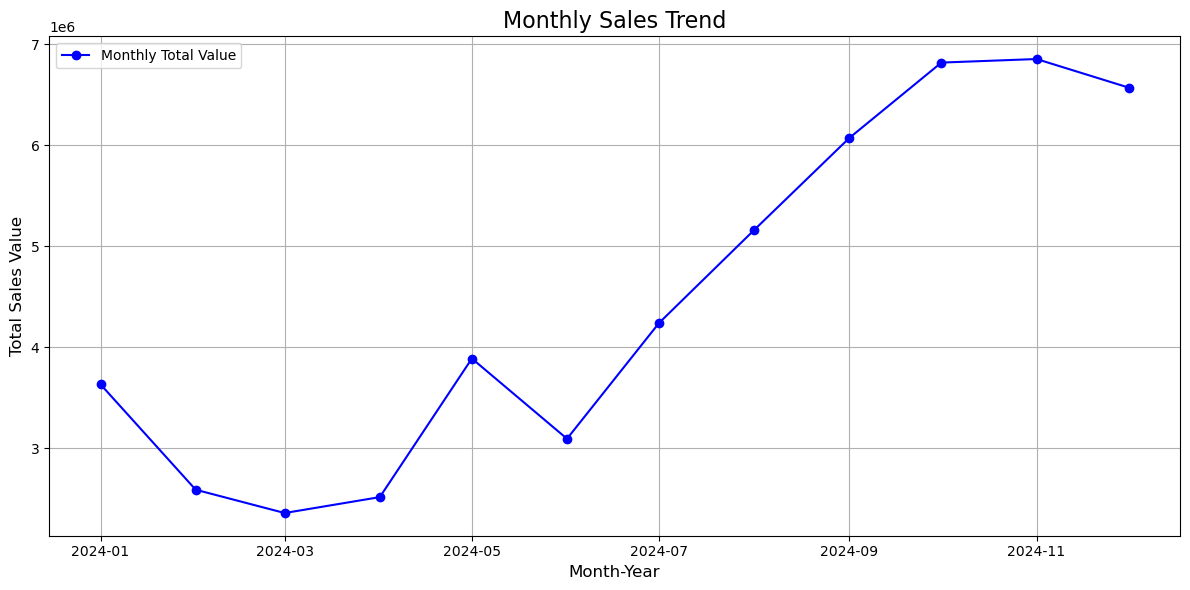

In [110]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['TOTAL VALUE'], label='Monthly Total Value', color='blue', marker='o')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Sales Value', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [111]:
print("Monthly Sales Data Overview:")
print(monthly_sales['TOTAL VALUE'].info())
print(monthly_sales['TOTAL VALUE'].head())


Monthly Sales Data Overview:
<class 'pandas.core.series.Series'>
DatetimeIndex: 12 entries, 2024-01-01 to 2024-12-01
Freq: MS
Series name: TOTAL VALUE
Non-Null Count  Dtype  
--------------  -----  
12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes
None
Month-Year
2024-01-01    3630510.0
2024-02-01    2587664.0
2024-03-01    2356885.0
2024-04-01    2514394.0
2024-05-01    3886747.0
Freq: MS, Name: TOTAL VALUE, dtype: float64


In [112]:
cleaned_sales = monthly_sales['TOTAL VALUE'].dropna().astype(float)


In [113]:
num_data_points = len(cleaned_sales)
max_lags = min(10, num_data_points - 1)  # Set max lags to be smaller than the dataset size


<Figure size 1000x500 with 0 Axes>

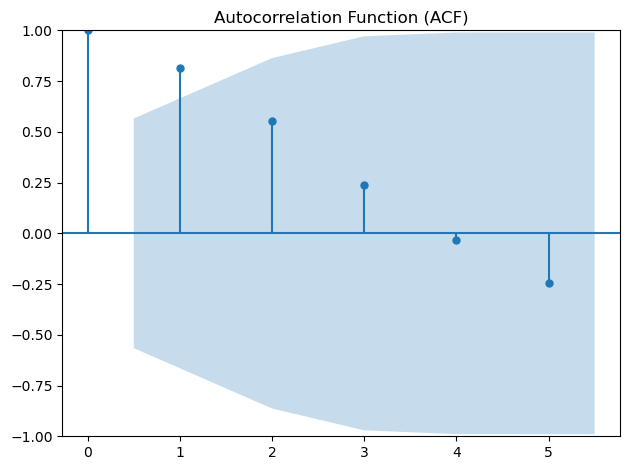

<Figure size 1000x500 with 0 Axes>

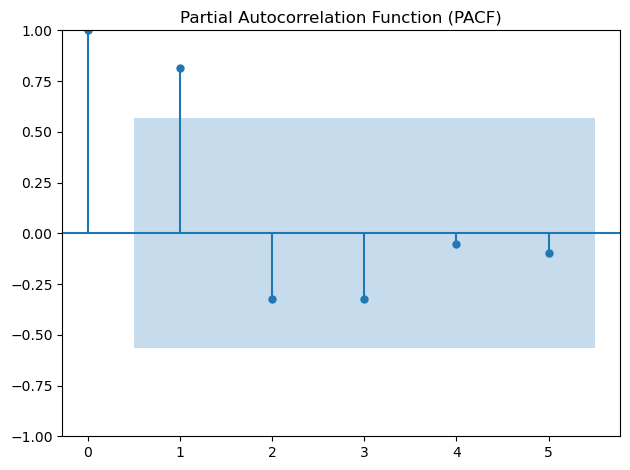

In [114]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Check the size of the data
sample_size = len(monthly_sales['TOTAL VALUE'].dropna())

# Dynamically calculate the maximum allowed lags
max_lags = min(5, sample_size // 2)  # Use 5 or half the sample size, whichever is smaller

# Plot ACF
plt.figure(figsize=(10, 5))
plot_acf(monthly_sales['TOTAL VALUE'], lags=max_lags, alpha=0.05)
plt.title("Autocorrelation Function (ACF)")
plt.tight_layout()
plt.show()

# Plot PACF
plt.figure(figsize=(10, 5))
plot_pacf(monthly_sales['TOTAL VALUE'], lags=max_lags, alpha=0.05, method='ywm')
plt.title("Partial Autocorrelation Function (PACF)")
plt.tight_layout()
plt.show()


In [119]:
# Fit the ARIMA model (use (p, d, q) values from ACF/PACF analysis)
model = ARIMA(monthly_sales['TOTAL VALUE'], order=(1, 1, 1))  # Adjust (p, d, q) as needed
arima_result = model.fit()

# Print model summary
print(arima_result.summary())


                               SARIMAX Results                                
Dep. Variable:            TOTAL VALUE   No. Observations:                   12
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -164.613
Date:                Wed, 29 Jan 2025   AIC                            335.225
Time:                        17:23:05   BIC                            336.419
Sample:                    01-01-2024   HQIC                           334.473
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9119      0.333     -2.740      0.006      -1.564      -0.260
ma.L1          0.8344      0.481      1.736      0.083      -0.108       1.777
sigma2      5.635e+11   1.45e-13   3.87e+24      0.0

In [122]:
# Forecast for the next 12 months
forecast_steps = 12
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(
    start=monthly_sales.index[-1] + pd.DateOffset(months=1), 
    periods=forecast_steps, 
    freq='MS'
)
forecast_df = pd.DataFrame({
    'Forecast': forecast.predicted_mean,
    'Lower Bound': forecast.conf_int()['lower TOTAL VALUE'],
    'Upper Bound': forecast.conf_int()['upper TOTAL VALUE']
}, index=forecast_index)

# Combine actual and forecasted data for visualization
combined_df = pd.concat([monthly_sales['TOTAL VALUE'], forecast_df['Forecast']], axis=1)

# Print forecasted values
print("\nForecasted Sales Values:")
print(forecast_df)



Forecasted Sales Values:
                Forecast   Lower Bound   Upper Bound
2025-01-01  6.707835e+06  5.236236e+06  8.179434e+06
2025-02-01  6.581923e+06  4.580196e+06  8.583650e+06
2025-03-01  6.696741e+06  4.218252e+06  9.175231e+06
2025-04-01  6.592039e+06  3.761964e+06  9.422114e+06
2025-05-01  6.687516e+06  3.506187e+06  9.868846e+06
2025-06-01  6.600451e+06  3.135156e+06  1.006575e+07
2025-07-01  6.679845e+06  2.924907e+06  1.043478e+07
2025-08-01  6.607446e+06  2.606880e+06  1.060801e+07
2025-09-01  6.673466e+06  2.421518e+06  1.092542e+07
2025-10-01  6.613263e+06  2.141273e+06  1.108525e+07
2025-11-01  6.668162e+06  1.971425e+06  1.136490e+07
2025-12-01  6.618100e+06  1.720019e+06  1.151618e+07


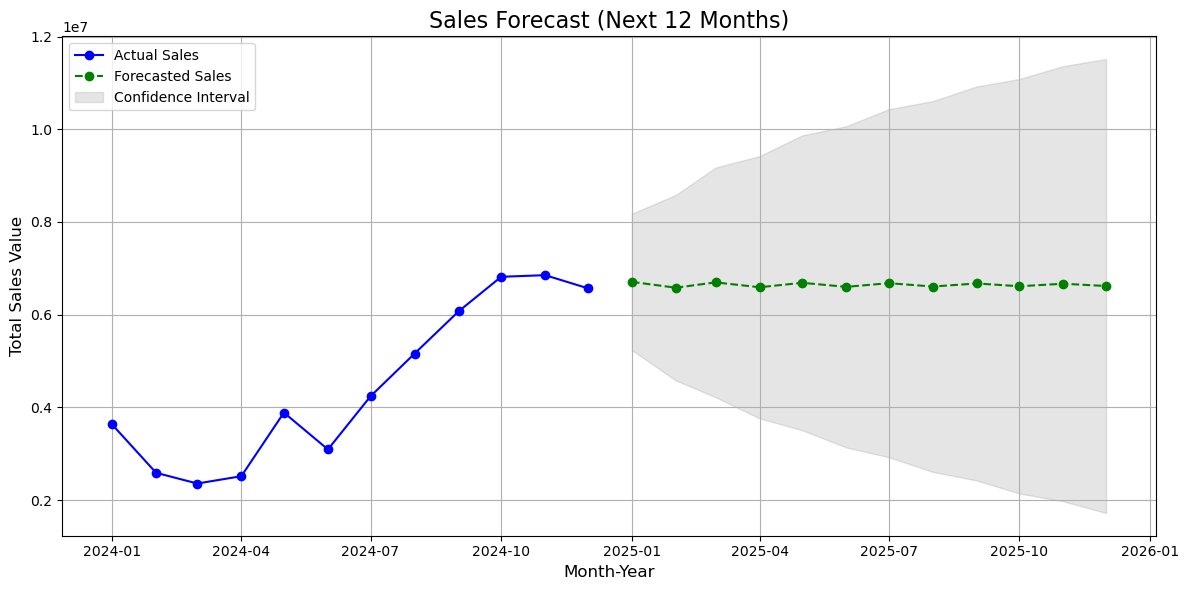

In [125]:
# Visualize the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['TOTAL VALUE'], label='Actual Sales', color='blue', marker='o')
plt.plot(forecast_df['Forecast'], label='Forecasted Sales', color='green', linestyle='--', marker='o')
plt.fill_between(forecast_df.index, forecast_df['Lower Bound'], forecast_df['Upper Bound'], color='gray', alpha=0.2, label='Confidence Interval')
plt.title('Sales Forecast (Next 12 Months)', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Sales Value', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Anomaly detection

In [128]:
from scipy.stats import zscore

# Calculate Z-scores for Quantity and Value
df_cleaned['Quantity_Z'] = zscore(df_cleaned['QUANTITY'])
df_cleaned['Value_Z'] = zscore(df_cleaned['TOTAL VALUE'])

# Define a threshold for anomaly detection
threshold = 3  # Common threshold, adjust if needed

# Identify anomalies
df_cleaned['Quantity_Anomaly'] = abs(df_cleaned['Quantity_Z']) > threshold
df_cleaned['Value_Anomaly'] = abs(df_cleaned['Value_Z']) > threshold

# Extract anomalies
quantity_anomalies = df_cleaned[df_cleaned['Quantity_Anomaly']]
value_anomalies = df_cleaned[df_cleaned['Value_Anomaly']]

# Display the anomalies
print("Quantity Anomalies:")
print(quantity_anomalies[['DATE', 'QUANTITY', 'Quantity_Z']])

print("\nValue Anomalies:")
print(value_anomalies[['DATE', 'TOTAL VALUE', 'Value_Z']])


Quantity Anomalies:
                      DATE  QUANTITY  Quantity_Z
369    2024-08-12 21:13:00        10    3.551242
623    2024-05-10 17:48:00        10    3.551242
668    2024-12-22 11:46:00        20    7.880312
1865   2024-10-20 21:23:00        15    5.715777
1903   2024-10-07 11:59:00        12    4.417056
...                    ...       ...         ...
331736 2024-12-31 10:13:00        18    7.014498
331802 2024-12-31 12:51:00        20    7.880312
332345 2024-12-06 12:30:00        10    3.551242
332737 2024-03-29 18:55:00        10    3.551242
332950 2024-05-28 18:16:00        10    3.551242

[1018 rows x 3 columns]

Value Anomalies:
                      DATE  TOTAL VALUE   Value_Z
1940   2024-06-09 19:04:00       4825.0  3.101628
2427   2024-11-24 16:00:00       6880.0  4.761663
3960   2024-09-06 14:04:00       5750.0  3.848846
4206   2024-12-19 15:58:00       9600.0  6.958887
4353   2024-07-29 20:46:00       4750.0  3.041043
...                    ...          ...       ...

Correlation between Quantity and Value: 0.73


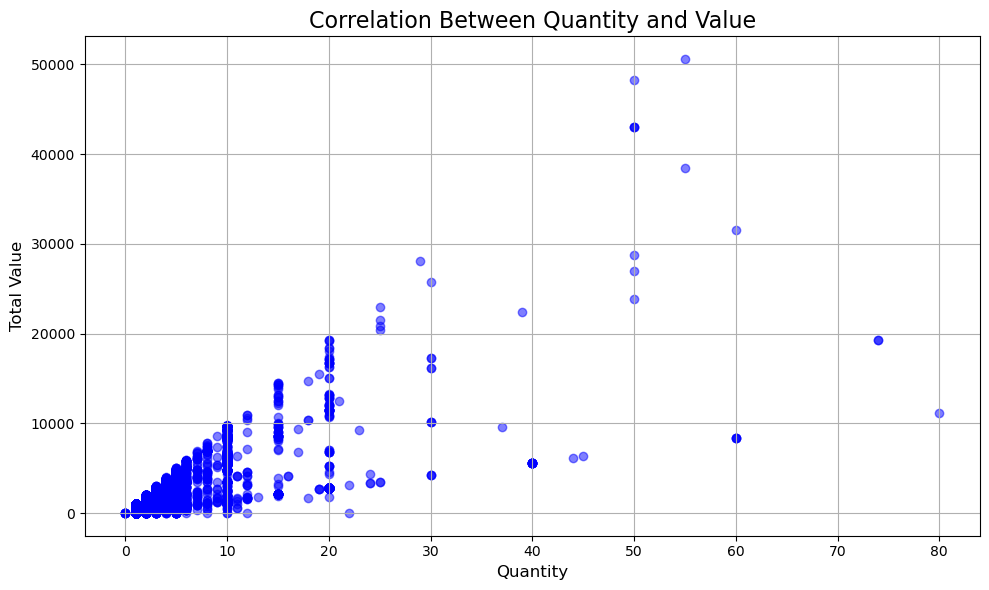

In [130]:
# Compute correlation between Quantity and Value
correlation = df_cleaned['QUANTITY'].corr(df_cleaned['TOTAL VALUE'])
print(f"Correlation between Quantity and Value: {correlation:.2f}")

# Visualize correlation using scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['QUANTITY'], df_cleaned['TOTAL VALUE'], alpha=0.5, color='blue')
plt.title("Correlation Between Quantity and Value", fontsize=16)
plt.xlabel("Quantity", fontsize=12)
plt.ylabel("Total Value", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


## Strategic sights and recommendations

In [133]:
# Aggregate total value by category
category_performance = df_cleaned.groupby('ANONYMIZED CATEGORY').agg(
    Total_Value=('TOTAL VALUE', 'sum'),
    Total_Quantity=('QUANTITY', 'sum')
).reset_index().sort_values(by='Total_Value', ascending=False)

# Display top category
print("Category Performance:")
print(category_performance.head(1))  # Top category

# Output insights
top_category = category_performance.iloc[0]['ANONYMIZED CATEGORY']
print(f"Top Product Category to Prioritize: {top_category}")


Category Performance:
   ANONYMIZED CATEGORY  Total_Value  Total_Quantity
30         Category-94   16749695.0           23667
Top Product Category to Prioritize: Category-94


In [135]:
# Analyze purchase frequency per business over time
business_trends = df_cleaned.groupby(['ANONYMIZED BUSINESS', 'Month-Year']).agg(
    Total_Quantity=('QUANTITY', 'sum')
).reset_index()

# Calculate percentage change in purchase frequency
business_trends['Quantity_Change'] = business_trends.groupby('ANONYMIZED BUSINESS')['Total_Quantity'].pct_change()

# Identify businesses with reduced frequency
declining_businesses = business_trends[business_trends['Quantity_Change'] < 0].dropna()
print("Businesses with Reduced Purchase Frequency:")
print(declining_businesses['ANONYMIZED BUSINESS'].unique())


Businesses with Reduced Purchase Frequency:
['Business-003d' 'Business-0072' 'Business-0078' ... 'Business-ff09'
 'Business-ffb1' 'Business-ffff']


Seasonal Trends:
   Month-Year  Total_Quantity  Total_Value
0     2024-01            5881    3630510.0
1     2024-02            4277    2587664.0
2     2024-03            3877    2356885.0
3     2024-04            4491    2514394.0
4     2024-05            6462    3886747.0
5     2024-06            4993    3092235.0
6     2024-07            6533    4239075.0
7     2024-08            9088    5160017.0
8     2024-09           10996    6070882.0
9     2024-10           13629    6817378.0
10    2024-11           13764    6852459.0
11    2024-12           14065    6569757.0


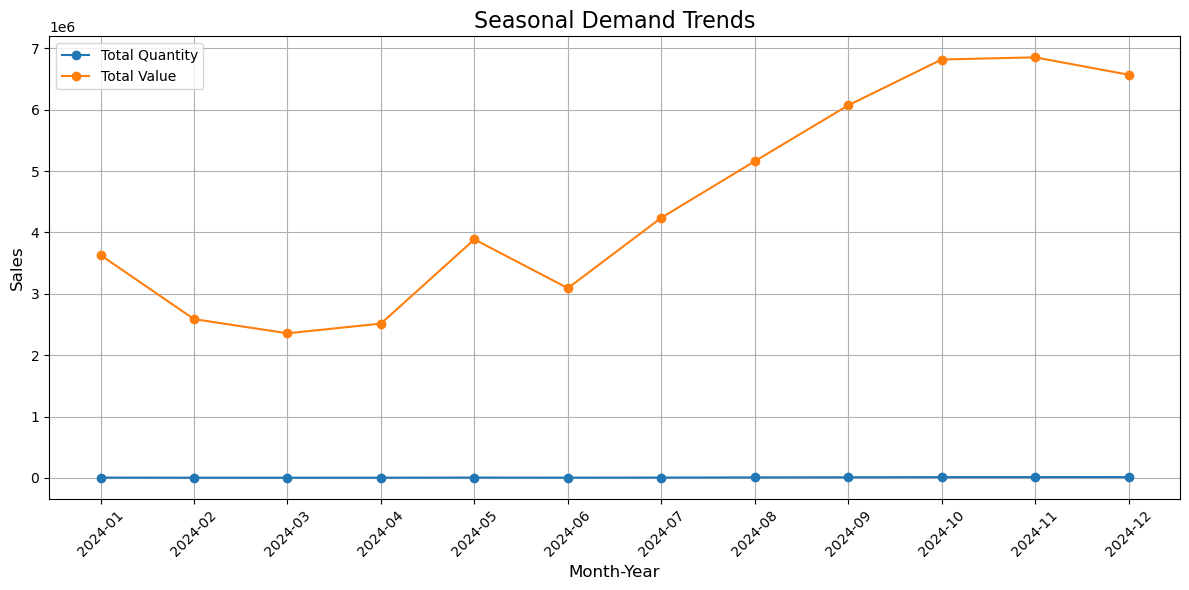

In [136]:
# Aggregate sales trends by month
seasonal_trends = df_cleaned.groupby('Month-Year').agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Value=('TOTAL VALUE', 'sum')
).reset_index()

print("Seasonal Trends:")
print(seasonal_trends)

# Visualize trends
plt.figure(figsize=(12, 6))
plt.plot(seasonal_trends['Month-Year'], seasonal_trends['Total_Quantity'], label='Total Quantity', marker='o')
plt.plot(seasonal_trends['Month-Year'], seasonal_trends['Total_Value'], label='Total Value', marker='o')
plt.title("Seasonal Demand Trends", fontsize=16)
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [139]:
pip install dash pandas plotly

In [140]:
!pip install dash

In [141]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.express as px
import numpy as np

In [142]:


# Group data for visualizations
monthly_trends = df_cleaned.groupby('Month-Year').agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Value=('TOTAL VALUE', 'sum')
).reset_index()

top_products = df_cleaned.groupby('ANONYMIZED PRODUCT').agg(
    Total_Value=('TOTAL VALUE', 'sum')
).reset_index().sort_values(by='Total_Value', ascending=False).head(5)

business_groups = df_cleaned.groupby('ANONYMIZED BUSINESS').agg(
    Total_Value=('TOTAL VALUE', 'sum')
).reset_index()
business_groups['Group'] = pd.qcut(
    business_groups['Total_Value'], 
    q=3, 
    labels=['Low Value', 'Medium Value', 'High Value']
)
business_group_counts = business_groups['Group'].value_counts()

# Create Dash app
app = dash.Dash(__name__)
app.title = "Sales Dashboard"

# Layout
app.layout = html.Div([
    html.H1("Sales Dashboard", style={'text-align': 'center'}),

    # Sales Trends Section
    html.Div([
        html.H2("Sales Trends Over Time"),
        dcc.Graph(id='sales-trends-chart'),
        html.Label("Filter by Business:"),
        dcc.Dropdown(
            id='business-filter',
            options=[{'label': b, 'value': b} for b in df_cleaned['ANONYMIZED BUSINESS'].unique()],
            value=None,
            placeholder="Select a business",
            clearable=True
        )
    ]),

    # Top Products Section
    html.Div([
        html.H2("Top 5 Most Valuable Products"),
        dcc.Graph(
            figure=px.bar(
                top_products, 
                x='ANONYMIZED PRODUCT', 
                y='Total_Value', 
                title="Top 5 Products by Total Value",
                labels={'ANONYMIZED PRODUCT': 'Product', 'Total_Value': 'Total Value'}
            )
        )
    ]),

    # Business Groups Section
    html.Div([
        html.H2("Business Grouping"),
        dcc.Graph(
            figure=px.pie(
                names=business_group_counts.index, 
                values=business_group_counts.values, 
                title="Distribution of Businesses by Value Group"
            )
        )
    ]),

    # Insights Section
    html.Div([
        html.H2("Strategic Insights"),
        html.P("Product Strategy: Focus on the most valuable product category based on analysis."),
        html.P("Customer Retention: Identify businesses with reduced purchase frequency and re-engage them with promotions."),
        html.P("Operational Efficiency: Improve inventory management by analyzing seasonal demand patterns.")
    ])
])

# Callbacks
@app.callback(
    Output('sales-trends-chart', 'figure'),
    Input('business-filter', 'value')
)
def update_sales_trends_chart(selected_business):
    if selected_business:
        filtered_data = df_cleaned[df_cleaned['ANONYMIZED BUSINESS'] == selected_business]
        trends = filtered_data.groupby('Month-Year').agg(
            Total_Quantity=('QUANTITY', 'sum'),
            Total_Value=('TOTAL VALUE', 'sum')
        ).reset_index()
    else:
        trends = monthly_trends

    fig = px.line(
        trends, 
        x='Month-Year', 
        y=['Total_Quantity', 'Total_Value'], 
        title="Sales Trends Over Time",
        labels={'value': 'Sales', 'Month-Year': 'Month-Year'}
    )
    fig.update_traces(mode='lines+markers')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
